In [1]:
import os
import glob
import numpy as np
from scipy.stats import pearsonr
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 300

In [2]:
def plot_comparisons(mtx_path):
    data = []  # List to hold the data from all files
    file_pattern = "pseudobulk*.txt"  # Adjust the pattern to match your files' names
    filenames = []

    
    for file_name in glob.glob(f'{mtx_path}/counts_filtered/{file_pattern}'):
        with open(file_name, 'r') as file:
            # Read each line, convert to float, and append to the list
            numbers = [float(line.strip()) for line in file]
            data.append(numbers)
            filenames.append(os.path.basename(file_name).split('.')[1])
    # Ensure that all files have the same number of lines
    if not all(len(lst) == len(data[0]) for lst in data):
        raise ValueError("Files have different numbers of lines.")
        
    # Calculate Pairwise Pearson Correlations
    num_files = len(data)
    c = {}
    
    for i in range(num_files):
        for j in range(i+1, num_files):
            corr, _ = pearsonr(data[i], data[j])
            x = filenames[i]
            y = filenames[j]
            if len(x) > 3:
                x = x[:3]
            if len(y) > 3:
                y = y[:3]

            c[f'{x}_{y}'] = corr
            c[f'{y}_{x}'] = corr
            c[f'{x}_{x}'] = 1
            c[f'{y}_{y}'] = 1
                        
    matrix = np.array([
        [c['nas_nas'], np.nan,       np.nan,       np.nan,       np.nan,       np.nan, np.nan],
        [c['mat_nas'], c['mat_mat'], np.nan,       np.nan,       np.nan,       np.nan, np.nan],
        [c['amb_nas'], c['amb_mat'], c['amb_amb'], np.nan,       np.nan,       np.nan, np.nan],
        [c['nuc_nas'], c['nuc_mat'], c['nuc_amb'], c['nuc_nuc'], np.nan,       np.nan, np.nan],
        [c['cel_nas'], c['cel_mat'], c['cel_amb'], c['cel_nuc'], c['cel_cel'], np.nan, np.nan],
        [c['tot_nas'], c['tot_mat'], c['tot_amb'], c['tot_nuc'], c['tot_cel'], c['tot_tot'], np.nan],
        [c['nm_nas'],  c['nm_mat'],  c['nm_amb'],  c['nm_nuc'],  c['nm_cel'],  c['nm_tot'], c['nm_nm']],
        
    ])


    mask = np.isnan(matrix)
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(matrix, annot=True, mask=mask, annot_kws={"size": 12, "fontweight": "bold"}, 
                fmt='.5f', cmap='coolwarm', square=True, cbar=True, vmin=0, vmax=1)
    
    ax.set_xticklabels(['N', 'M', 'A', 'N+A', 'M+A', 'N+M+A', 'N+M'], fontsize=15)
    ax.set_yticklabels(['N', 'M', 'A', 'N+A', 'M+A', 'N+M+A', 'N+M'], fontsize=15)
    plt.xticks(rotation=0)
    plt.yticks(rotation=0)
    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=16)  # Set font size


    
    plt.show()




def plot_compositions(mtx_path):
    f = open(f'{mtx_path}/counts_filtered/counts.txt', "r")
    data = [int(line.strip()) for line in f.readlines()]
    total = (data[0]+data[1]+data[2])
    data[0] = 100*data[0] / total
    data[1] = 100*data[1] / total
    data[2] = 100*data[2] / total
    plt.figure(figsize=(4, 1.25))
    plt.xlabel("Percent assignment", fontsize=8)
    bars = plt.barh(['Nascent', 'Mature', 'Ambiguous'], data, color='gray')
    for bar in bars:
        value = round(bar.get_width(), 2)
        plt.text(value, bar.get_y() + bar.get_height() / 2,
                 f' {value}%',
                 va='center', ha='left')
    
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['bottom'].set_visible(True)
    ax.spines['left'].set_visible(True)
    ax.set_xlim(0, 100)
    ax.xaxis.set_ticks(np.arange(0, 100.1, 25))
    plt.show()
    

# human_5k_jejunum (nuclei)

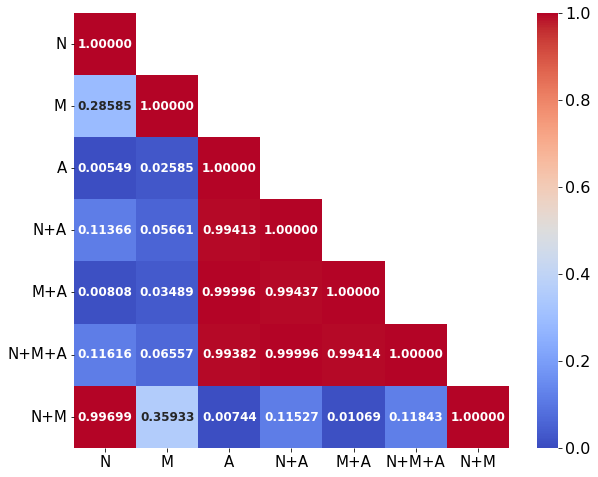

In [3]:
plot_comparisons("matrices_human_5k_jejunum_nuclei")

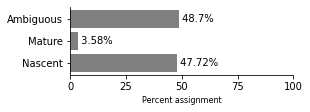

In [4]:
plot_compositions("matrices_human_5k_jejunum_nuclei")

# human_20k_pbmc (cells)

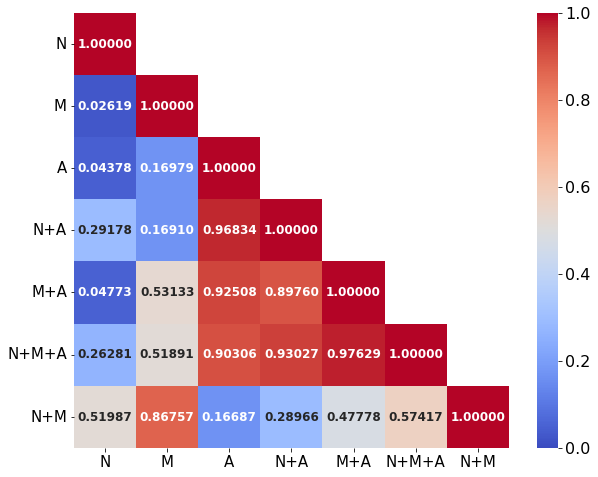

In [5]:
plot_comparisons("matrices_human_20k_PBMC")

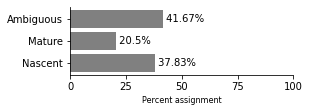

In [6]:
plot_compositions("matrices_human_20k_PBMC")

# mouse_5k_lung (nuclei)

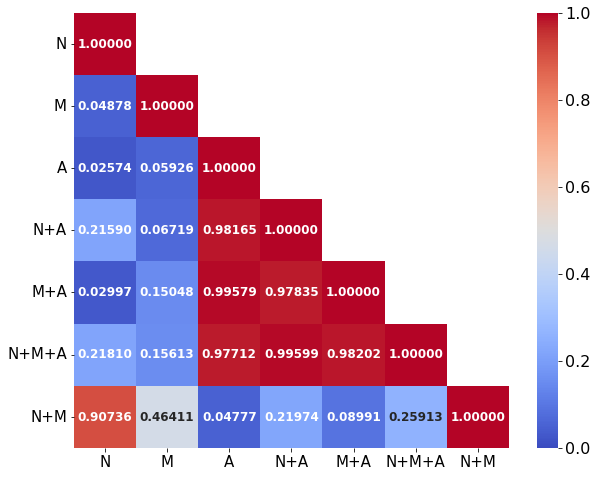

In [7]:
plot_comparisons("matrices_mouse_5k_lung")

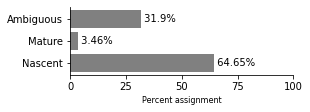

In [8]:
plot_compositions("matrices_mouse_5k_lung")

# mouse_10k_neuron (cells)

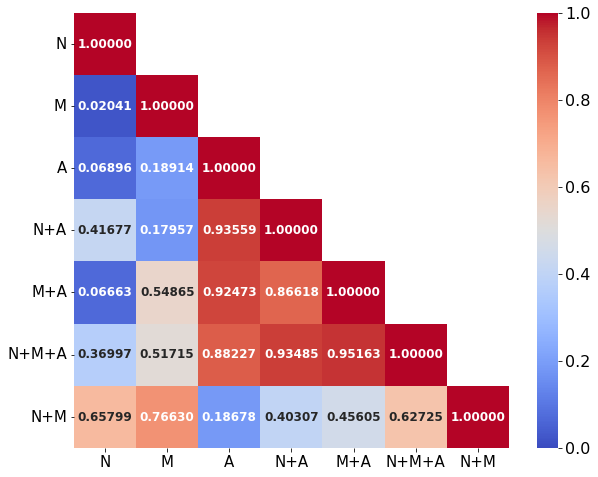

In [9]:
plot_comparisons("matrices_mouse_10k_neuron")

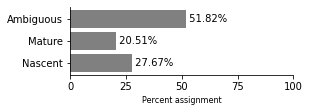

In [10]:
plot_compositions("matrices_mouse_10k_neuron")

# Mouse FFPE

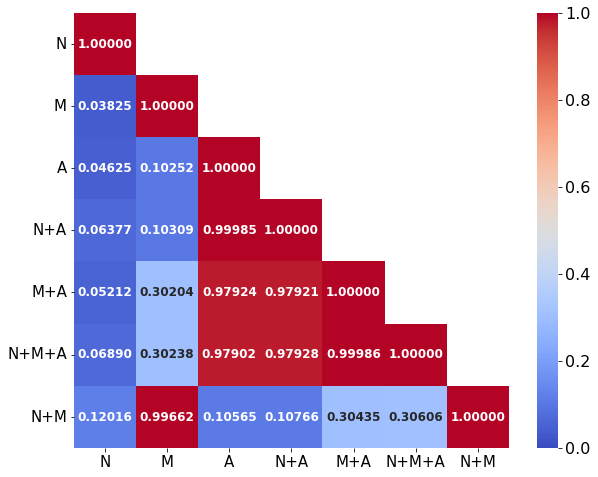

In [11]:
plot_comparisons("matrices_mouse_ffpe")

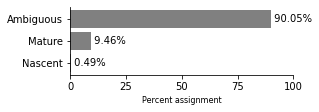

In [12]:
plot_compositions("matrices_mouse_ffpe")